In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import classification as lg
import digit_class as digits
import digits_functions as dif
#import digits_function as digitsfunc
from datetime import datetime
import time
from sklearn import svm, ensemble

In [3]:
train_x, train_y = digits.load_digits("/Users/xinw/Documents/projects/velox-centipede/data", digits_filename = "mnist_train.csv")
Z = digits.normalize_digits(train_x)
test_x, test_y = digits.load_digits("/Users/xinw/Documents/projects/velox-centipede/data", digits_filename = "mnist_test.csv")
test_Z = digits.normalize_digits(test_x)
#Z = digits.fourier_project(train_x)

Source file: /Users/xinw/Documents/projects/velox-centipede/data/mnist_train.csv
Number of image files: 60000
Source file: /Users/xinw/Documents/projects/velox-centipede/data/mnist_test.csv
Number of image files: 10000


In [27]:
len(test_x)

10000

In [4]:
L = dif.fourier_project(test_x, 100)

In [5]:
lala = (L+0.5).astype('int64')

In [6]:
dic = {}
cnt = 0
for i in range(lala.shape[0]):
    key = str(lala[i].tolist())
    if key in dic:
        dic[key] += 1
    else:
        cnt += 1
        dic[key] = 1

In [7]:
cnt

5266

# Error VS Cache Miss

In [9]:
tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=30, testSize=100)
xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)

finish generate data for user specific model!


In [13]:
len(test_xs[0])

784

In [14]:
len(test_x[0])

784

In [ ]:
k = 10
svm_mtl = lg.UserDefineModel(xs,ys,dy,ss,'train-all','l2') # using the default value 
svm_mtl.train_all_fs()
svm_mtl.train_ws()
print 'Finish Training!'

error_list = []
cache_miss = []
for s in range(1,1000):
    print 'cache size is ', s
    key = (dif.fourier_project(np.asarray(test_xs),s)+0.5).astype('int64')
    dic = {}
    svm_err = lg.seg_model_error_01(svm_mtl,test_xs,test_ys,test_ts, key, dic)
    error_list.append(svm_err)
    print 'error rate is ', svm_err
    cache_miss.append(svm_mtl.hit)
    print 'cache miss is ', svm_mtl.hit
    svm_mtl.hit = 0
    print 







TOTALS: fit time: 15.264370
start training ws!
ws: feature_time (s): 0.061827, train_time (s): 0.027055
Finish Training!
cache size is  1
error rate is  0.434
cache miss is  1

cache size is  2
error rate is  0.434
cache miss is  1

cache size is  3
error rate is  0.434
cache miss is  1

cache size is  4
error rate is  0.434
cache miss is  1

cache size is  5
error rate is  0.434
cache miss is  1

cache size is  6
error rate is  0.434
cache miss is  1

cache size is  7
error rate is  0.434
cache miss is  1

cache size is  8
error rate is  0.434
cache miss is  1

cache size is  9
error rate is  0.434
cache miss is  1

cache size is  10
error rate is  0.434
cache miss is  1

cache size is  11
error rate is  0.434
cache miss is  1

cache size is  12
error rate is  0.434
cache miss is  1

cache size is  13
error rate is  0.434
cache miss is  1

cache size is  14
error rate is  0.434
cache miss is  3

cache size is  15
error rate is  0.434
cache miss is  1

cache size is  16
error rate is  

In [13]:
type(test_x)

numpy.ndarray

<function matplotlib.pyplot.show>

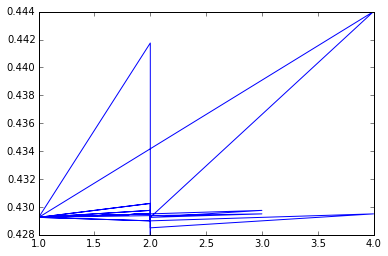

In [15]:
plt.plot(cache_miss, error_list)
plt.show